<img src="https://www.peoplecert.org/-/media/peoplecert/images/tc-images/peoplelogy-skill/peopleogy-logo.png?h=966&iar=0&w=2231&hash=28DD04BA69030200BD7ADEA1370449B3" style="float: left; margin: 20px; height: 55px">

# Data Modelling
_Author: Elissa Azhari_

---

### Milestones:
- Data Pre-processing/ Data cleaning
- Feature Engineering
- **Model Selection**
- **Model Training (Train-test)**
- Model Deployment
- Monitoring Data & Preparing Report

## Capstone Project: Identifying Quality of Apples

---

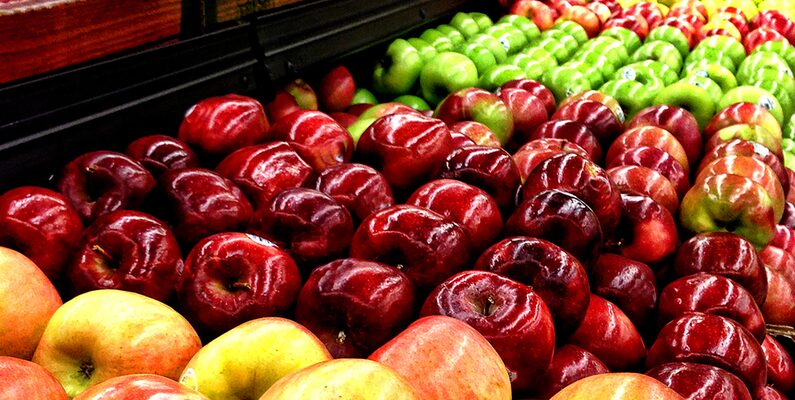

Image source: Robin Keefe from Shutterstock

## Problem Statement

Inconsistency fruit quality sold in market which contributes to food insecurity.

## Objective

A predictive model that indentifies the quality of apple crops by learning the pre-existing datas. Prediction model will help to sustain the quality of apples in the supermarket and ensuring food security. The end product of the capstone project is a report that concludes the predictive model information.

## Project Flowchart

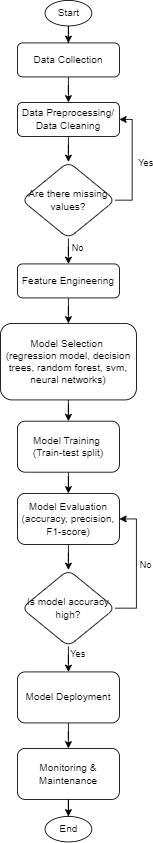

## Project Milestones

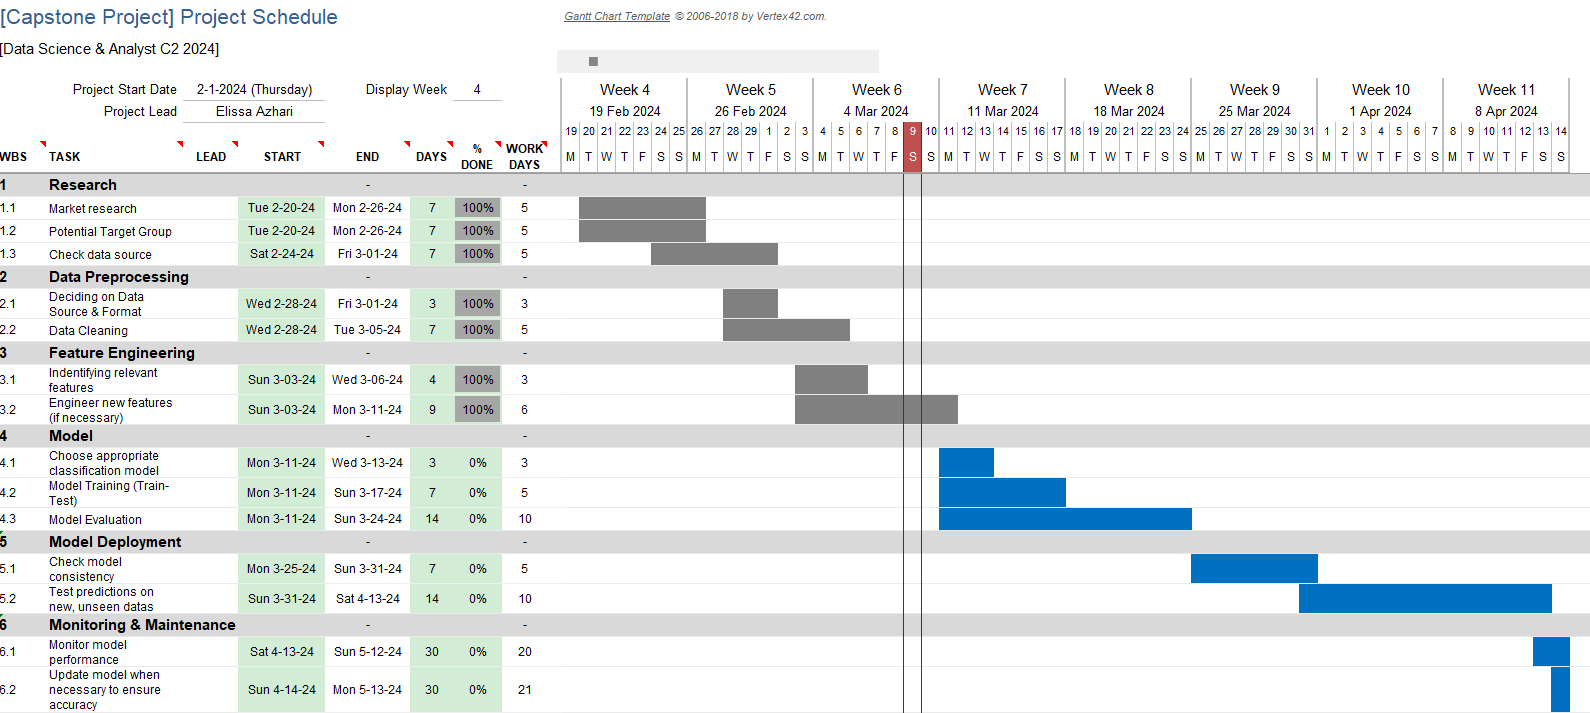

### Data Pre-Processing

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
apples = pd.read_csv('apple_quality.csv')
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
# Before data cleaning
apples.shape

(4001, 9)

In [7]:
# Since there are null values, we need to either drop it or replace value!
# in this case, it is found that the 4001 row was falsely read as data, when there is only a credit line of the data owner.
# Therefore, I will drop.na the 4001th row it.

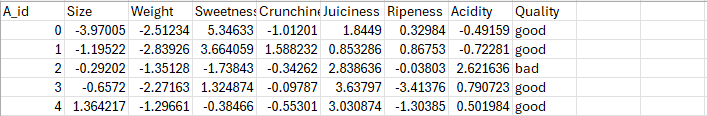

-----
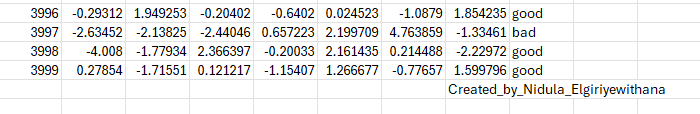

In [8]:
apples.dropna(inplace=True)
apples.shape

(4000, 9)

In [9]:
apples.info()

# Acidity is still object. Need to convert it into float64

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
# Converting Acidity to float
apples['Acidity'] = apples['Acidity'].astype(float)

# Converting Apple id (A_id) to object
apples['A_id'] = apples['A_id'].astype(object)

# Converting Quality to int, whereby.. Good = 1, Bad = 0
apples['Quality'] = apples['Quality'].replace(['good', 'bad'],
                        [1, 0])

In [11]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


We can conclude that data is cleaned.

In [23]:
# Counting the ratio of "Good" and "Bad"
value_counts = apples['Quality'].value_counts()

# Print the counts
print("Count of 0s:", value_counts[0])
print("Count of 1s:", value_counts[1])

Count of 0s: 1996
Count of 1s: 2004


### _Note: A_id is a unique identity and will not be treated as numeric_

# Binomial Logistic Regression

### What is Logistic Regression?

Logistic regression is a supervised machine learning algotrithm that is widely used for classification class. Inputs are taken as inpendent variables and produces a probabilty value of 0 and 1.

For this dataset,

- Good quality apples = 1
- Bad quality apples = 0

In [178]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [179]:
# Defining the independent & dependent variables
X = apples[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']]
y = apples['Quality']

In [180]:
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.25,
                                       random_state=42)

In [181]:
# Instantiate model
lr = LogisticRegression()

# Fit model.
lr.fit(X_train, y_train)

LogisticRegression()

In [182]:
# Generate predictions.
preds = lr.predict(X_test)

In [183]:
# Generate confusion matrix.
# Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

cm = confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.
cm

array([[371, 124],
       [121, 384]], dtype=int64)

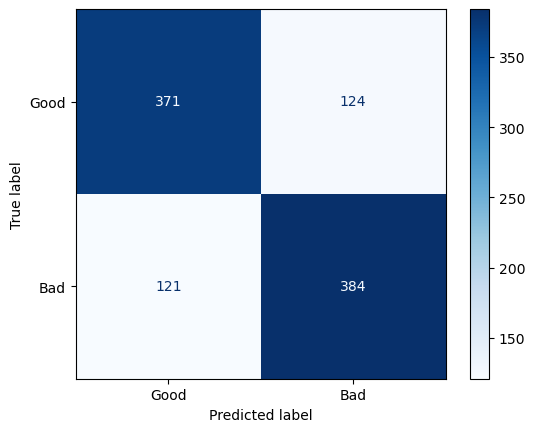

In [184]:
# plot it!
# https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/20_plot_confusion_matrix.ipynb
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

### Evaluation Metrics

In [185]:
#Checking the accuracy
acc = accuracy_score(y_test, preds)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 75.5


In [186]:
# Checking the f1-score
f1_score = f1_score(y_test, preds, average=None)
print("Logistic Regression model f-1 score:", f1_score)

Logistic Regression model f-1 score: [0.75177305 0.75814413]


In [187]:
# Checking for precision
precision = precision_score(y_test, preds)
print("Logistic Regression model precision score:", precision)

Logistic Regression model precision score: 0.7559055118110236


In [188]:
# Checking for recall 
recall = recall_score(y_test, preds)
print("Logistic Regression model recall score:", recall)

Logistic Regression model recall score: 0.7603960396039604


In [189]:
# Save TN/FP/FN/TP values.
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# What is the Specificity?
spec =  tn / (tn +fp)
spec

0.7494949494949495

#### Relationship between Sensitivity and Specificity

In [190]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Now you can create your pred_df DataFrame
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': logreg.predict_proba(X_test)[:, 1]})

pred_df.head()

,true_values,pred_probs
555,1,0.562016
3491,0,0.834179
527,0,0.881010
3925,1,0.435705
2989,0,0.044026


C:\Users\Elissa\AppData\Local\Temp\ipykernel_4744\4004018521.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')


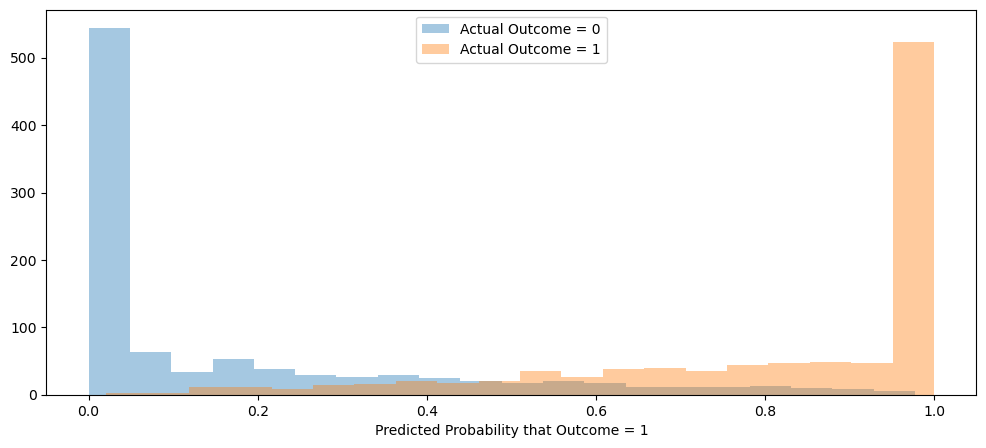

In [191]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

# orange in blue region - is false positive (either FN or FP)

C:\Users\Elissa\AppData\Local\Temp\ipykernel_4744\1296038816.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')


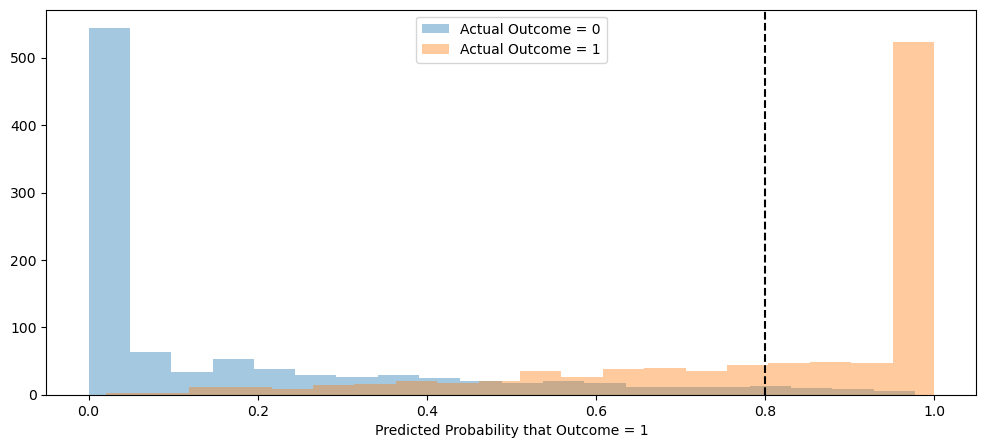

In [192]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')

# Add cutoff line: treshold (0.5, 0.1, 0.8 e.g)
plt.axvline(0.8, color = 'black', linestyle = '--')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();


### Receiver Operating Characteristics (ROC) Curve

In [193]:
# import the necessary library
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

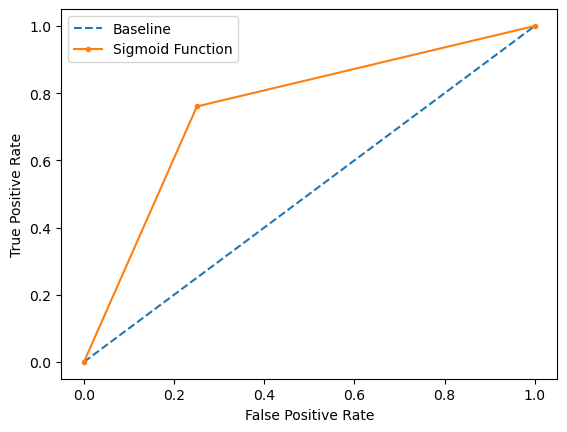

In [206]:
# generate a no skill prediction (majority class)
g_preds = [0 for _ in range(len(y_test))]

# ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, preds)
ns_fpr, ns_tpr, _ = roc_curve(y_test, g_preds)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Sigmoid Function')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add a legend
plt.legend();

# Show the plot
plt.show()


### ROC AUC

In [207]:
# Calculate ROC AUC.
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.8210141014101409

The ROC AUC score is 0.821. The value is closer to 1, which means that the Logistic Regression model is good.